## Monte Carlo Simulation in Python
### 01-16-2017

Monte Carlo Simulations test various outcomes of a situation

only one outcome will ever happen, but monte carlo analysis allows us to analyze the risk of other things happening given statistical distributions
choices should not be assessed after their outcome, rather at the time of the decision
a monte carlo simulator can help one visualize most or all of the potential outcomes to have an idea regarding risk of a decision


A monte carlo generator can also help illustrate the flaws of the gambler's fallacy. Many gamblers, and sometimes especially gamblers who understand statistics, fall prey to the gambler's fallacy.

The fallacy asserts that, taking something like the flipping of a coin for heads or tails, you have a known 50/50 odds. That said, if you just flipped heads five times a row, somehow you're more likely to flip tails next.

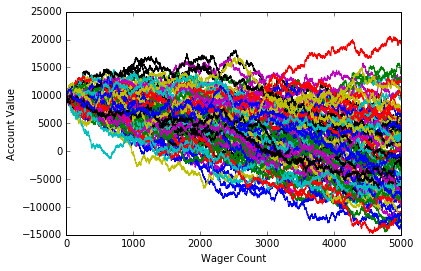

% making money: 0.0808080808081


In [46]:
import random
import matplotlib.pyplot as plt
%matplotlib inline

def rollDice():
    roll = random.randint(1,100)
    
    if roll == 100:
        #print roll, 'Roll was 100, you lose'
        return False
    elif roll <=50:
        #print roll, 'Roll was 1-50, you lose'
        return False
    elif 100 > roll > 50:
        #print roll, 'Roll was 51-99, you win!'
        return True

def simple_bettor(funds, initial_wager, wager_count):
    value = funds
    wager = initial_wager
    
    wagerX = []
    valueY = []
    
    currentWager = 1
    
    while currentWager <= wager_count:
        if rollDice():
            value += wager
            wagerX.append(currentWager)
            valueY.append(value)
        else:
            value -= wager
            wagerX.append(currentWager)
            valueY.append(value)
        currentWager += 1
    
    plt.plot(wagerX,valueY)
    if valueY[-1] <= funds:
        return False
    else:
        return True
     
# more wagers, more broke, probability of success not in favor of bettor
x = 1
results = []
# for 50 different bettors, start with 10K, wager 100 bucks each time, 1000 times
while x < 100:
    results.append(simple_bettor(10000,100,5000))
    x+=1
    

plt.ylabel('Account Value')
plt.xlabel('Wager Count')
plt.show()

print '% making money:', np.mean(results)

In [43]:
sum(results)/float(len(results))

0.24489795918367346

In [47]:
import time

#lower_bust = 19.00
#higher_profit = 69.00

# back to 1,000
sampleSize = 10000
startingFunds = 100000
wagerSize = 100
wagerCount = 1000


def rollDice():
    roll = random.randint(1,100)

    if roll <= 50:
        return False
    elif roll >= 51:
        return True

def dAlembert(funds,initial_wager,wager_count):#,color):
    global ROI
    global da_busts
    global da_profits
    
    value = funds
    wager = initial_wager
    wX = []
    vY = []
    currentWager = 1
    previousWager = 'win'
    previousWagerAmount = initial_wager

    while currentWager <= wager_count:
        if previousWager == 'win':
            if wager == initial_wager:
                pass
            else:
                wager -= initial_wager

            #print 'current wager:',wager,'value:',value


            if rollDice():
                value += wager
                #print 'we won! Current Value:',value
                wX.append(currentWager)
                vY.append(value)
            else:
                value -= wager 
                previousWager = 'loss'
                #print 'we lost, current value',value
                previousWagerAmount = wager
                wX.append(currentWager)
                vY.append(value)
                if value <= 0:
                    da_busts += 1
                    break
        elif previousWager == 'loss':
            wager = previousWagerAmount + initial_wager
            if (value - wager) <= 0:
                wager = value
            #print 'Lost the last wager, current wager:',wager,'value:',value
            
            if rollDice(): 
                value += wager
                #print 'we won! Current Value:',value
                previousWager = 'win'
                wX.append(currentWager)
                vY.append(value)
            else:
                value -= wager
                previousWager = 'loss'
                #print 'we lost, current value',value
                previousWagerAmount = wager
                wX.append(currentWager)
                vY.append(value)

                if value <= 0:
                    da_busts += 1
                    break

        currentWager += 1

    #plt.plot(wX,vY)

    if value > funds:
        da_profits+=1

    ROI += value

def multiple_bettor2(funds,initial_wager,wager_count,multiple):#,color):
    global ROI
    global multiple_busts
    global multiple_profits
    
    value = funds
    wager = initial_wager
    wX = []
    vY = []
    currentWager = 1
    previousWager = 'win'
    previousWagerAmount = initial_wager

    while currentWager <= wager_count:
        if previousWager == 'win':
            if rollDice():
                value += wager
                wX.append(currentWager)
                vY.append(value)
            else:
                value -= wager 
                previousWager = 'loss'
                previousWagerAmount = wager
                wX.append(currentWager)
                vY.append(value)
                if value <= 0:
                    multiple_busts += 1
                    break
        elif previousWager == 'loss':
            if rollDice():
                wager = previousWagerAmount * multiple
                if (value - wager) <= 0:
                    wager = value
                    
                value += wager
                wager = initial_wager
                previousWager = 'win'
                wX.append(currentWager)
                vY.append(value)
            else:
                wager = previousWagerAmount * multiple
                if (value - wager) <= 0:
                    wager = value
                value -= wager
                previousWager = 'loss'
                previousWagerAmount = wager
                wX.append(currentWager)
                vY.append(value)

                if value <= 0:
                    multiple_busts += 1
                    break

    
        currentWager += 1
    #print 'ending Value:',value 
    ROI += value

    #plt.plot(wX,vY)

    if value > funds:
        multiple_profits+=1  


daSampSize = 100000
da_busts = 0.0
da_profits = 0.0
ROI = 0

counter = 1
while counter <= daSampSize:
    #multiple_bettor2(startingFunds,wagerSize,wagerCount,2)
    dAlembert(startingFunds,wagerSize,wagerCount)
    counter += 1

print 'Total Amount Invested:', daSampSize * startingFunds
print 'Total Return:',ROI
print 'Difference:',ROI-(daSampSize * startingFunds)
print 'Bust Rate:',(da_busts/daSampSize)*100.00
print 'Profit Rate:',(da_profits/daSampSize)*100.00

Total Amount Invested: 10000000000
Total Return: 10007140000
Difference: 7140000
Bust Rate: 18.841
Profit Rate: 64.932


In [54]:
# full simulator using multiple strategies
import time

def rollDice():
    roll = random.randint(1,100)

    if roll <= 50:
        #print roll,'roll was 1-50, you lose. Play again!'
        return False

    elif roll >= 51:
        #print roll,'roll was 51-99, you win! *pretty lights flash* Play more!'
        return True

#dalembert method
def dAlembert(funds,initial_wager,wager_count):

    global Ret # return
    global da_busts # number of busts
    global da_profits # profit

    value = funds # what we start with
    wager = initial_wager # what we wager on each bet
    currentWager = 1 # how many wagers we make
    previousWager = 'win' # take into account previous result
    previousWagerAmount = initial_wager # starting point for previousWageramount

    # while loop for # wagers
    while currentWager <= wager_count:
        # implement dalembert, if we win, reduce
        if previousWager == 'win':
            if wager == initial_wager:
                pass
            else:
                wager -= initial_wager

            #print 'current wager:',wager,'value:',value

            # roll the dice
            if rollDice():
                # increase our value
                value += wager
                #print 'we won, current value:',value
                previousWagerAmount = wager # set previous wager amt
            else:
                # we lost, reduce value
                value -= wager
                previousWager = 'loss'
                #print 'we lost, current value',value
                previousWagerAmount = wager

                # check value after loss, if we lose, log a bust, break loop
                if value <= 0:
                    da_busts += 1
                    break

        # if we lose roll, set previousWager
        elif previousWager == 'loss':
            # dalembert, add initial_wager
            wager = previousWagerAmount + initial_wager
            # check to see if wager takes us below 0, if so, just bet remaining value
            if (value - wager) <= 0:
                wager = value

            #print 'lost the last wager, current wager:',wager,'value',value


            if rollDice():
                value += wager
                #print 'we won, current value:',value
                previousWagerAmount = wager
                previousWager = 'win'

            else:
                value -= wager
                #print 'we lost, current value:',value
                previousWagerAmount = wager

                if value <= 0:
                    da_busts += 1
                    break
        currentWager += 1

    # if we make money, log it
    if value > funds:
        da_profits += 1

    #print value

    Ret += value


def multiple_bettor(funds, initial_wager, wager_count):
    global multiple_busts
    global multiple_profits

    value = funds
    wager = initial_wager
    wX = []
    vY = []

    currentWager = 1
    previousWager = 'win'
    previousWagerAmount = initial_wager

    while currentWager <= wager_count:
        if previousWager == 'win':
            #print 'we won the last wager, great'
            if rollDice():
                value+=wager
                #print value
                wX.append(currentWager)
                vY.append(value)
            else:
                value -= wager
                previousWager = 'loss'
                #print value
                previousWagerAmount = wager
                wX.append(currentWager)
                vY.append(value)
                if value <= 0:
                    #print 'we went broke after'.currentWager,'bets'
                    multiple_busts += 1
                    break

        
        elif previousWager == 'loss':
            #print 'we lost the last one, so we will be smart and double'
            if rollDice():
                wager = previousWagerAmount * random_multiple

                if (value - wager) < 0:
                    wager = value
                #print 'we won',wager
                value += wager
                #print value
                wager = initial_wager
                previousWager = 'win'
                wX.append(currentWager)
                vY.append(value)
            else:
                wager = previousWagerAmount * random_multiple
                if (value - wager) < 0:
                    wager = value
                #print 'we lost',wager
                value -= wager
                previousWagerAmount = wager
                wX.append(currentWager)
                vY.append(value)
                if value <= 0:
                    #print 'we went broke after',currentWager,'bets'
                    multiple_busts += 1
                    break

                #print value
                previousWager = 'loss'

                


        currentWager += 1

    #print value
    #plt.plot(wX,vY,color)
    if value > funds:
        multiple_profits += 1

    
    





    

def doubler_bettor(funds, initial_wager, wager_count,color):
    value = funds
    wager = initial_wager
    global doubler_busts
    global doubler_profits
    wX = []
    vY = []

    currentWager = 1
    previousWager = 'win'
    previousWagerAmount = initial_wager

    while currentWager <= wager_count:
        if previousWager == 'win':
            #print 'we won the last wager, great'
            if rollDice():
                value+=wager
                #print value
                wX.append(currentWager)
                vY.append(value)
            else:
                value -= wager
                previousWager = 'loss'
                #print value
                previousWagerAmount = wager
                wX.append(currentWager)
                vY.append(value)
                if value <= 0:
                    #print 'we went broke after'.currentWager,'bets'
                    doubler_busts += 1
                    break

        
        elif previousWager == 'loss':
            #print 'we lost the last one, so we will be smart and double'
            if rollDice():
                wager = previousWagerAmount * 2

                if (value - wager) < 0:
                    wager = value
                #print 'we won',wager
                value += wager
                #print value
                wager = initial_wager
                previousWager = 'win'
                wX.append(currentWager)
                vY.append(value)
            else:
                wager = previousWagerAmount * 2
                if (value - wager) < 0:
                    wager = value
                #print 'we lost',wager
                value -= wager
                previousWagerAmount = wager
                wX.append(currentWager)
                vY.append(value)
                if value <= 0:
                    #print 'we went broke after',currentWager,'bets'
                    doubler_busts += 1
                    break

                #print value
                previousWager = 'loss'

                


        currentWager += 1

    #print value
    plt.plot(wX,vY,color)
    if value > funds:
        doubler_profits += 1
        
        
def simple_bettor(funds, initial_wager, wager_count,color):
    global simple_busts
    global simple_profits
    value = funds
    wager = initial_wager

    wX = []
    vY = []

    currentWager = 1

    while currentWager <= wager_count:
        if rollDice():
            value += wager
            wX.append(currentWager)
            vY.append(value)
        else:
            value -= wager
            wX.append(currentWager)
            vY.append(value)

        currentWager += 1

    if value <= 0:
        value = 0
        simple_busts+=1
    #print 'Funds:', value

    plt.plot(wX,vY,color)
    if value > funds:
        value = 0
        simple_profits+=1


lower_bust = 31.235
higher_profit = 63.208

sampleSize = 1000
startingFunds = 10000



while True:
    #wagerSize = 100
    #wagerCount = 100000
    wagerSize = random.uniform(1.0,1000.00)
    wagerCount = random.uniform(10.0,10000)

    Ret = 0.0
    da_profits = 0.0         
    da_busts = 0.0
    daSampSize = 10000
    counter = 1

    while counter <= daSampSize:  
        dAlembert(startingFunds,wagerSize,wagerCount)
        counter+=1

    ROI = Ret - (daSampSize*startingFunds)
    totalInvested = daSampSize*startingFunds
    percentROI = (ROI/totalInvested)*100.00
    # add var
    wagerSizePercent = (wagerSize/startingFunds)*100.00


    # if over 1.
    if percentROI > 1:
        print '___________________________________________'
        print 'Total invested:',daSampSize*startingFunds
        print 'Total Return:', Ret
        print 'ROI',Ret - (daSampSize*startingFunds)
        print 'Percent ROI:',percentROI
        print 'Bust Rate:',(da_busts/daSampSize)*100.00
        print 'Profit rate:',(da_profits/daSampSize)*100.00
        print 'wager size:',wagerSize
        print 'wager count:',wagerCount
        #################### change var
        print 'wager size percentage:',wagerSizePercent

        ### we want to begin saving this stuff...

        ## stuff to save: percentROI,wagerSizePercent,wagerCount

        saveFile = open('monteCarlo.csv','a')
        saveLine = '\n'+str(percentROI)+','+str(wagerSizePercent)+','+str(wagerCount)+',g'
        saveFile.write(saveLine)
        saveFile.close()
        
    elif percentROI < -1:
        print '___________________________________________'
        print 'Total invested:',daSampSize*startingFunds
        print 'Total Return:', Ret
        print 'ROI',Ret - (daSampSize*startingFunds)
        print 'Percent ROI:',percentROI
        print 'Bust Rate:',(da_busts/daSampSize)*100.00
        print 'Profit rate:',(da_profits/daSampSize)*100.00
        print 'wager size:',wagerSize
        print 'wager count:',wagerCount
        #################### change var
        print 'wager size percentage:',wagerSizePercent

        ### we want to begin saving this stuff...

        ## stuff to save: percentROI,wagerSizePercent,wagerCount

        saveFile = open('monteCarlo.csv','a')
        saveLine = '\n'+str(percentROI)+','+str(wagerSizePercent)+','+str(wagerCount)+',r'
        saveFile.write(saveLine)
        saveFile.close()

___________________________________________
Total invested: 100000000
Total Return: 108849918.769
ROI 8849918.76871
Percent ROI: 8.84991876871
Bust Rate: 95.02
Profit rate: 4.96
wager size: 255.881886981
wager count: 2526.67539898
wager size percentage: 2.55881886981
___________________________________________
Total invested: 100000000
Total Return: 80102451.891
ROI -19897548.109
Percent ROI: -19.897548109
Bust Rate: 99.12
Profit rate: 0.88
wager size: 769.328730316
wager count: 5297.8123178
wager size percentage: 7.69328730316
___________________________________________
Total invested: 100000000
Total Return: 97254817.0224
ROI -2745182.9776
Percent ROI: -2.7451829776
Bust Rate: 96.54
Profit rate: 3.46
wager size: 526.827839558
wager count: 1458.04913115
wager size percentage: 5.26827839558
___________________________________________
Total invested: 100000000
Total Return: 96913017.5915
ROI -3086982.40851
Percent ROI: -3.08698240851
Bust Rate: 98.47
Profit rate: 1.53
wager size: 806.62

KeyboardInterrupt: 